In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Read all datasets into dataframes

df_test = pd.read_csv('Go_auto_test_data.csv')
df_train = pd.read_csv('Go_auto_train_data.csv')
df_new_test = pd.read_csv('Go_auto_new_test_data.csv')
df_new_train = pd.read_csv('Go_auto_new_train_data.csv')
df_used_test = pd.read_csv('Go_auto_used_test_data.csv')
df_used_train = pd.read_csv('Go_auto_used_train_data.csv')

pd.set_option('display.max_columns', None)

In [ ]:
df_train.columns

Index(['dealer_city', 'stock_type', 'mileage', 'msrp', 'model_year',
       'make_category', 'model_category', 'exterior_color_category',
       'interior_color_category', 'wheelbase_from_vin', 'drivetrain_from_vin',
       'transmission_from_vin', 'fuel_type_from_vin', 'number_price_changes',
       'price_imputed', 'segment', 'listing_month', 'make', 'model',
       'exterior_color', 'interior_color', 'days_on_market'],
      dtype='object')

In [ ]:
df_train['listing_month'].value_counts()

,count
listing_month,
5,19720
4,13469
6,10146
7,4505
3,4288
2,1624
12,855
1,787
9,674


# Heatmap

In [ ]:
df_train['make_model'] = df_train['make'] + df_train['model']
df_test['make_model'] = df_test['make'] + df_test['model']

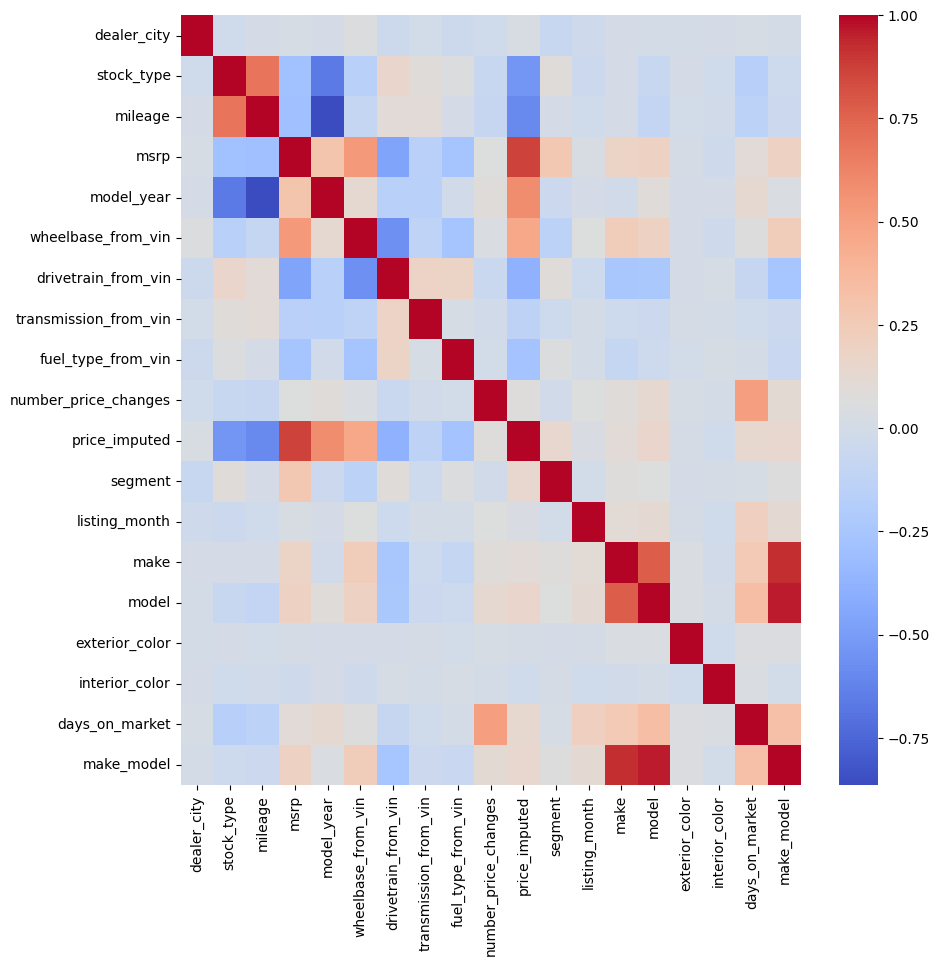

In [ ]:
# Correlation heatmap

corr = df_train.corr(numeric_only=True)
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.show()

In [ ]:
def cyc_encode(df, col, max_val):
    df[col + '_sin'] = np.sin(2 * np.pi * df[col]/max_val)
    df[col + '_cos'] = np.cos(2 * np.pi * df[col]/max_val)
    return df

cyc_encode(df_new_train, 'listing_month', 12)
cyc_encode(df_new_test, 'listing_month', 12)

,dealer_city,mileage,msrp,model_year,make_category,model_category,exterior_color_category,interior_color_category,wheelbase_from_vin,drivetrain_from_vin,transmission_from_vin,fuel_type_from_vin,number_price_changes,price_imputed,segment,listing_month,make,model,exterior_color,interior_color,days_on_market,car_age,price_per_year,mileage_per_year,price_group,age_group,listing_month_sin,listing_month_cos
0,7,10.0,30499,2024,Chevrolet,Trailblazer,gray,black,2640.0,1,0,2,1,34693.0,0,4,37.865924,24.613636,45.527342,56.17992,11,1,34693.0,10.0,1,0,0.866025,-0.500000
1,1,0.0,65030,2024,Ford,Bronco,gray,black,2950.0,0,0,2,0,87045.0,0,5,44.199240,42.580292,45.527342,56.17992,25,1,87045.0,0.0,2,0,0.500000,-0.866025
2,1,10.0,69900,2024,BMW,i4,"green,white",black,2856.0,1,0,1,0,86277.0,1,7,59.918421,38.193548,9.000000,56.17992,7,1,86277.0,10.0,2,0,-0.500000,-0.866025
3,1,9.0,30499,2024,Hyundai,Kona,white,black,2660.0,1,0,2,0,36228.0,0,4,36.904626,41.927711,53.213701,56.17992,33,1,36228.0,9.0,1,0,0.866025,-0.500000
4,1,22.0,59995,2023,Ford,Mustang MACH-E,black,black,2984.0,1,0,1,1,59288.0,0,5,44.199240,57.040000,59.416125,56.17992,25,2,29644.0,11.0,2,0,0.500000,-0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6452,1,0.0,59265,2024,Audi,Q5,white,black,2819.0,1,0,2,0,70824.0,1,5,69.301493,49.078571,53.213701,56.17992,36,1,70824.0,0.0,2,0,0.500000,-0.866025
6453,1,32.0,59995,2024,Ford,Mustang MACH-E,gray,black,2984.0,1,0,1,10,65312.5,0,5,44.199240,57.040000,45.527342,56.17992,25,1,65312.5,32.0,2,0,0.500000,-0.866025
6454,1,0.0,36850,2024,Toyota,Rav4,white,black,2690.0,1,0,2,0,41090.0,0,5,21.004762,12.799308,53.213701,56.17992,6,1,41090.0,0.0,1,0,0.500000,-0.866025
6455,1,15.0,34945,2024,GMC,Terrain,blue,black,2726.0,1,0,2,0,39950.0,0,5,44.896680,61.838863,61.643465,56.17992,47,1,39950.0,15.0,1,0,0.500000,-0.866025


In [ ]:
new_corr = df_new_train.corr(numeric_only=True)
print(new_corr['days_on_market'].sort_values(ascending=False))

days_on_market           1.000000
listing_month_cos        0.735211
model                    0.527792
number_price_changes     0.475775
make                     0.443012
listing_month            0.339098
car_age                  0.336499
exterior_color           0.094935
wheelbase_from_vin       0.094453
price_group              0.090061
msrp                     0.065497
price_imputed            0.052943
interior_color           0.048627
segment                  0.033746
mileage_per_year         0.029774
mileage                  0.014077
fuel_type_from_vin       0.003419
transmission_from_vin   -0.000646
age_group               -0.006034
dealer_city             -0.008234
price_per_year          -0.094895
drivetrain_from_vin     -0.109780
listing_month_sin       -0.300979
model_year              -0.336499
Name: days_on_market, dtype: float64


In [ ]:
categorical_columns = ['make_category', 'model_category', 'exterior_color_category', 'interior_color_category']

In [ ]:
regr = LinearRegression()

In [ ]:
y_train = df_train['days_on_market']
X_train = df_train.drop(columns=['days_on_market', 'make_category', 'model_category', 'exterior_color_category', 'interior_color_category'])
y_test = df_test['days_on_market']
X_test = df_test.drop(columns=['days_on_market', 'make_category', 'model_category', 'exterior_color_category', 'interior_color_category'])


In [ ]:
X_train.head()

,dealer_city,stock_type,mileage,msrp,model_year,wheelbase_from_vin,drivetrain_from_vin,transmission_from_vin,fuel_type_from_vin,number_price_changes,price_imputed,segment,listing_month,make,model,exterior_color,interior_color
0,2,0,9.0,48895,2024,2630.0,1,1,3,2,54992.0,0,12,56.003569,59.683099,48.467206,45.752013
1,2,0,24.0,54645,2023,3569.0,0,0,3,6,54725.0,0,11,88.441031,118.728000,48.009631,45.752013
2,7,0,10.0,60625,2023,3683.0,0,0,3,3,69660.0,0,5,40.408173,42.916474,45.214841,45.752013
3,2,1,22790.0,33350,2023,2735.0,2,0,3,9,34500.0,0,5,36.461066,31.913649,48.009631,45.752013
4,2,0,5.0,62900,2023,3988.0,0,0,4,9,67405.0,0,5,40.408173,42.916474,48.009631,45.752013


In [ ]:
print(X_test.shape, y_test.shape)

(14329, 17) (14329,)


In [ ]:
print('Regression Statistics - All Models')

regr.fit(X_train, y_train)
score = regr.score(X_test, y_test)
print(f'Score: {score:.2f}')

y_pred = regr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

r2 = r2_score(y_test, y_pred)
print(f'R2: {r2:.2f}')

Regression Statistics - All Models
Score: 0.36
Mean Squared Error: 1833.40
R2: 0.36


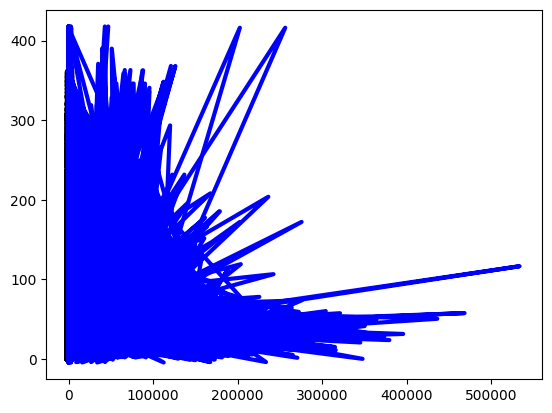

In [ ]:
y_pred = regr.predict(X_test)
plt.scatter(X_test.iloc[:, 0], y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.show()

# USED

In [ ]:
y_used_train = df_used_train['days_on_market']
y_used_test = df_used_test['days_on_market']

X_used_train = df_used_train.drop(columns=['days_on_market', 'make_category', 'model_category', 'exterior_color_category', 'interior_color_category'])
X_used_test = df_used_test.drop(columns=['days_on_market', 'make_category', 'model_category', 'exterior_color_category', 'interior_color_category'])

In [ ]:
print('Regression Statistics - Used Model')

regr.fit(X_used_train, y_used_train)
score = regr.score(X_used_train, y_used_train)
print(f'Score: {score:.2f}')

y_used_pred = regr.predict(X_used_test)

mse = mean_squared_error(y_used_test, y_used_pred)
print(f'Mean Squared Error: {mse:.2f}')

r2 = r2_score(y_used_test, y_used_pred)
print(f'R2: {r2:.2f}')


Regression Statistics - Used Model
Score: 0.38
Mean Squared Error: 1114.38
R2: 0.35


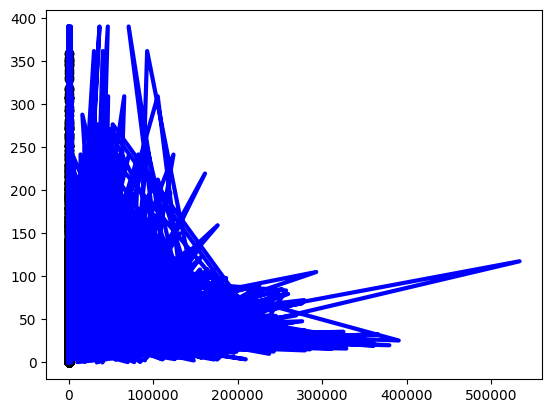

In [ ]:
plt.scatter(X_used_test.iloc[:, 0], y_used_test, color='black')
plt.plot(X_used_test, y_used_pred, color='blue', linewidth=3)

plt.show()

# NEW

In [ ]:
y_new_train = df_new_train['days_on_market']
y_new_test = df_new_test['days_on_market']

X_new_train = df_new_train.drop(columns=['days_on_market', 'make_category', 'model_category', 'exterior_color_category', 'interior_color_category'])
X_new_test = df_new_test.drop(columns=['days_on_market', 'make_category', 'model_category', 'exterior_color_category', 'interior_color_category'])

In [ ]:
print(f'X_new_train shape: {X_new_train.shape}')
print(f'y_new_train shape: {y_new_train.shape}')
print(f'X_new_test shape: {X_new_test.shape}')
print(f'y_new_test shape: {y_new_test.shape}')

X_new_train shape: (25825, 16)
y_new_train shape: (25825,)
X_new_test shape: (6457, 16)
y_new_test shape: (6457,)


In [ ]:
print('Regression Statistics - New Model')

regr.fit(X_new_train, y_new_train)
score = regr.score(X_new_train, y_new_train)
print(f'Score: {score:.2f}')

y_new_pred = regr.predict(X_new_test)

mse = mean_squared_error(y_new_test, y_new_pred)
print(f'Mean Squared Error: {mse:.2f}')

r2 = r2_score(y_new_test, y_new_pred)
print(f'R2: {r2:.2f}')

Regression Statistics - New Model
Score: 0.49
Mean Squared Error: 2247.37
R2: 0.47


'dealer_city', 'stock_type', 'mileage', 'msrp', 'model_year', 'make',
       'model', 'exterior_color_category', 'interior_color_category',
       'wheelbase_from_vin', 'drivetrain_from_vin', 'transmission_from_vin',
       'fuel_type_from_vin', 'number_price_changes', 'price_imputed',
       'segment', 'days_on_market'

# Most Important Columns

Mileage, model_year, make, model, price_imputed, stock_type

In [ ]:
X_train = df_train[['mileage', 'model_year', 'msrp', 'make', 'model', 'price_imputed', 'stock_type']]
X_test = df_test[['mileage', 'model_year', 'msrp', 'make','model', 'price_imputed', 'stock_type']]

y_train = df_train['days_on_market']
y_test = df_test['days_on_market']

In [ ]:
# Scaling

scaler = preprocessing.StandardScaler()
X_train.loc[:, ['mileage', 'price_imputed']] = scaler.fit_transform(X_train[['mileage', 'price_imputed']])
X_test.loc[:, ['mileage', 'price_imputed']] = scaler.transform(X_test[['mileage', 'price_imputed']])


In [ ]:
print('Regression Statistics - All Models')

regr.fit(X_train, y_train)
score = regr.score(X_test, y_test)
print(f'Score: {score:.2f}')

y_pred = regr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

r2 = r2_score(y_test, y_pred)
print(f'R2: {r2:.2f}')

Regression Statistics - All Models
Score: 0.10
Mean Squared Error: 2587.00
R2: 0.10


# NEW

Isolating important columns to see if that improves scores.


In [ ]:
X_new_train = df_new_train[['mileage', 'model_year', 'msrp', 'make', 'model', 'price_imputed']]
X_new_test = df_new_test[['mileage', 'model_year', 'msrp', 'make','model', 'price_imputed']]

y_new_train = df_new_train['days_on_market']
y_new_test = df_new_test['days_on_market']


In [ ]:
# Scaling

scaler = preprocessing.StandardScaler()
X_new_train.loc[:, ['mileage', 'price_imputed']] = scaler.fit_transform(X_new_train[['mileage', 'price_imputed']])
X_new_test.loc[:, ['mileage', 'price_imputed']] = scaler.transform(X_new_test[['mileage', 'price_imputed']])



In [ ]:
# Test the model

print('Regression Statistics - New Model - Isolating Columns')

regr.fit(X_new_train, y_new_train)
score = regr.score(X_new_train, y_new_train)
print(f'Score: {score:.2f}')

y_new_pred = regr.predict(X_new_test)

mse = mean_squared_error(y_new_test, y_new_pred)
print(f'Mean Squared Error: {mse:.2f}')

r2 = r2_score(y_new_test, y_new_pred)
print(f'R2: {r2:.2f}')

Regression Statistics - New Model - Isolating Columns
Score: 0.29
Mean Squared Error: 3133.56
R2: 0.26


# Used Model - Isolating Columns

In [ ]:
X_used_train = df_used_train[['mileage', 'model_year', 'msrp', 'make', 'model', 'price_imputed']]
X_used_test = df_used_test[['mileage', 'model_year', 'msrp', 'make','model', 'price_imputed']]

y_used_train = df_used_train['days_on_market']
y_used_test = df_used_test['days_on_market']

# Scaling
scaler = preprocessing.StandardScaler()
X_used_train.loc[:, ['mileage', 'price_imputed']] = scaler.fit_transform(X_used_train[['mileage', 'price_imputed']])
X_used_test.loc[:, ['mileage', 'price_imputed']] = scaler.transform(X_used_test[['mileage', 'price_imputed']])

# Modeling
print('Regression Statistics - Used Model - Isolating Columns')

regr.fit(X_used_train, y_used_train)
score = regr.score(X_used_train, y_used_train)
print(f'Score: {score:.2f}')

y_used_pred = regr.predict(X_used_test)

mse = mean_squared_error(y_used_test, y_used_pred)
print(f'Mean Squared Error: {mse:.2f}')

r2 = r2_score(y_used_test, y_used_pred)
print(f'R2: {r2:.2f}')

Regression Statistics - Used Model - Isolating Columns
Score: 0.05
Mean Squared Error: 1711.03
R2: 0.01


# New Model - Mileage, Year, Price


In [ ]:
X_new_test = df_new_test[['mileage', 'model_year', 'price_imputed']]
X_new_train = df_new_train[['mileage', 'model_year', 'price_imputed']]

y_new_test = df_new_test['days_on_market']
y_new_train = df_new_train['days_on_market']

# Scaler
scaler = preprocessing.StandardScaler()
X_new_train.loc[:, ['mileage', 'price_imputed']] = scaler.fit_transform(X_new_train[['mileage', 'price_imputed']])
X_new_test.loc[:, ['mileage', 'price_imputed']] = scaler.transform(X_new_test[['mileage', 'price_imputed']])

# Modeling
print('Regression Statistics - New Model - Mileage, Year, Price')

regr.fit(X_new_train, y_new_train)
score = regr.score(X_new_train, y_new_train)
print(f'Score: {score:.2f}')

y_new_pred = regr.predict(X_new_test)

mse = mean_squared_error(y_new_test, y_new_pred)
print(f'Mean Squared Error: {mse:.2f}')

r2 = r2_score(y_new_test, y_new_pred)
print(f'R2: {r2:.2f}')


Regression Statistics - New Model - Mileage, Year, Price
Score: 0.12
Mean Squared Error: 3739.14
R2: 0.12


# New Model - Mileage, Year, Price, Make, Model

In [ ]:
X_new_test = df_new_test[['mileage', 'model_year', 'price_imputed', 'make', 'model']]
X_new_train = df_new_train[['mileage', 'model_year', 'price_imputed', 'make', 'model']]

y_new_test = df_new_test['days_on_market']
y_new_train = df_new_train['days_on_market']

# Scaler
scaler = preprocessing.StandardScaler()
X_new_train.loc[:, ['mileage', 'price_imputed']] = scaler.fit_transform(X_new_train[['mileage', 'price_imputed']])
X_new_test.loc[:, ['mileage', 'price_imputed']] = scaler.transform(X_new_test[['mileage', 'price_imputed']])

# Modeling
print('Regression Statistics - New Model - Mileage, Year, Price, Make, Model')

regr.fit(X_new_train, y_new_train)
score = regr.score(X_new_train, y_new_train)
print(f'Score: {score:.2f}')

y_new_pred = regr.predict(X_new_test)

mse = mean_squared_error(y_new_test, y_new_pred)
print(f'Mean Squared Error: {mse:.2f}')

r2 = r2_score(y_new_test, y_new_pred)
print(f'R2: {r2:.2f}')


Regression Statistics - New Model - Mileage, Year, Price, Make, Model
Score: 0.29
Mean Squared Error: 3131.75
R2: 0.26


# New Model - Mileage, Age, Price, Make, Model

Try converting model year to car age

In [ ]:
df_new_test['car_age'] = 2025 - df_new_test['model_year']
df_new_train['car_age'] = 2025 - df_new_train['model_year']

X_new_test = df_new_test[['mileage', 'car_age', 'price_imputed', 'make', 'model']]
X_new_train = df_new_train[['mileage', 'car_age', 'price_imputed', 'make', 'model']]

y_new_test = df_new_test['days_on_market']
y_new_train = df_new_train['days_on_market']

# Scaler
scaler = preprocessing.StandardScaler()
X_new_train.loc[:, ['mileage', 'price_imputed']] = scaler.fit_transform(X_new_train[['mileage', 'price_imputed']])
X_new_test.loc[:, ['mileage', 'price_imputed']] = scaler.transform(X_new_test[['mileage', 'price_imputed']])

# Modeling
print('Regression Statistics - New Model - Mileage, Car Age, Price, Make, Model')

regr.fit(X_new_train, y_new_train)
score = regr.score(X_new_train, y_new_train)
print(f'Score: {score:.2f}')

y_new_pred = regr.predict(X_new_test)

mse = mean_squared_error(y_new_test, y_new_pred)
print(f'Mean Squared Error: {mse:.2f}')

r2 = r2_score(y_new_test, y_new_pred)
print(f'R2: {r2:.2f}')

Regression Statistics - New Model - Mileage, Car Age, Price, Make, Model
Score: 0.29
Mean Squared Error: 3131.75
R2: 0.26


In [ ]:
X_new_test = df_new_test[['mileage', 'model_year', 'price_imputed', 'make', 'model']]
X_new_train = df_new_train[['mileage', 'model_year', 'price_imputed', 'make', 'model']]

y_new_test = df_new_test['days_on_market']
y_new_train = df_new_train['days_on_market']

# Scaler
scaler = preprocessing.StandardScaler()
X_new_train.loc[:, ['mileage', 'price_imputed']] = scaler.fit_transform(X_new_train[['mileage', 'price_imputed']])
X_new_test.loc[:, ['mileage', 'price_imputed']] = scaler.transform(X_new_test[['mileage', 'price_imputed']])

# Modeling
print('Regression Statistics - New Model - Mileage, Year, Price, Make, Model')

regr.fit(X_new_train, y_new_train)
score = regr.score(X_new_train, y_new_train)
print(f'Score: {score:.2f}')

y_new_pred = regr.predict(X_new_test)

mse = mean_squared_error(y_new_test, y_new_pred)
print(f'Mean Squared Error: {mse:.2f}')

r2 = r2_score(y_new_test, y_new_pred)
print(f'R2: {r2:.2f}')


Regression Statistics - New Model - Mileage, Year, Price, Make, Model
Score: 0.29
Mean Squared Error: 3131.75
R2: 0.26


In [ ]:
# Add price per year column
df_new_test['price_per_year'] = df_new_test['price_imputed'] / df_new_test['car_age']
df_new_train['price_per_year'] = df_new_train['price_imputed'] / df_new_train['car_age']

X_new_test = df_new_test[['mileage', 'car_age', 'price_imputed', 'make', 'model', 'price_per_year']]
X_new_train = df_new_train[['mileage', 'car_age', 'price_imputed', 'make', 'model', 'price_per_year']]

y_new_test = df_new_test['days_on_market']
y_new_train = df_new_train['days_on_market']

# Scaler
scaler = preprocessing.StandardScaler()
X_new_train.loc[:, ['mileage', 'price_imputed']] = scaler.fit_transform(X_new_train[['mileage', 'price_imputed']])
X_new_test.loc[:, ['mileage', 'price_imputed']] = scaler.transform(X_new_test[['mileage', 'price_imputed']])

# Modeling
print('Regression Statistics - New Model - Mileage, Year, Price, Make, Model')

regr.fit(X_new_train, y_new_train)
score = regr.score(X_new_train, y_new_train)
print(f'Score: {score:.2f}')

y_new_pred = regr.predict(X_new_test)

mse = mean_squared_error(y_new_test, y_new_pred)
print(f'Mean Squared Error: {mse:.2f}')

r2 = r2_score(y_new_test, y_new_pred)
print(f'R2: {r2:.2f}')

Regression Statistics - New Model - Mileage, Year, Price, Make, Model
Score: 0.30
Mean Squared Error: 3128.41
R2: 0.26


In [ ]:
# Add mileage per year column
df_new_test['mileage_per_year'] = df_new_test['mileage'] / df_new_test['car_age']
df_new_train['mileage_per_year'] = df_new_train['mileage'] / df_new_train['car_age']

X_new_test = df_new_test[['mileage', 'car_age', 'price_imputed', 'make', 'model', 'price_per_year', 'mileage_per_year']]
X_new_train = df_new_train[['mileage', 'car_age', 'price_imputed', 'make', 'model', 'price_per_year', 'mileage_per_year']]

y_new_test = df_new_test['days_on_market']
y_new_train = df_new_train['days_on_market']

# Scaler
scaler = preprocessing.StandardScaler()
X_new_train.loc[:, ['mileage', 'price_imputed']] = scaler.fit_transform(X_new_train[['mileage', 'price_imputed']])
X_new_test.loc[:, ['mileage', 'price_imputed']] = scaler.transform(X_new_test[['mileage', 'price_imputed']])

# Modeling
print('Regression Statistics - New Model - Mileage, Year, Price, Make, Model, Price_per_year', 'Mileage_per_year')

regr.fit(X_new_train, y_new_train)
score = regr.score(X_new_train, y_new_train)
print(f'Score: {score:.2f}')

y_new_pred = regr.predict(X_new_test)

mse = mean_squared_error(y_new_test, y_new_pred)
print(f'Mean Squared Error: {mse:.2f}')

r2 = r2_score(y_new_test, y_new_pred)
print(f'R2: {r2:.2f}')


Regression Statistics - New Model - Mileage, Year, Price, Make, Model, Price_per_year Mileage_per_year
Score: 0.30
Mean Squared Error: 3132.99
R2: 0.26


# Groupings

In [ ]:
# Price Group
def price_func(x):
    if x < 10000:
        return 0
    elif x < 50000:
        return 1
    elif x < 100000:
        return 2
    else:
        return 3

df_new_test['price_group'] = df_new_test['price_imputed'].apply(price_func)
df_new_train['price_group'] = df_new_train['price_imputed'].apply(price_func)

In [ ]:
# Age Group
def age_func(x):
    if x < 5:
        return 0
    elif x < 10:
        return 1
    elif x < 20:
        return 2
    else:
        return 3

df_new_test['age_group'] = df_new_test['car_age'].apply(age_func)
df_new_train['age_group'] = df_new_train['car_age'].apply(age_func)

In [ ]:
X_new_test = df_new_test[['mileage', 'car_age', 'price_imputed', 'make', 'model', 'price_per_year', 'mileage_per_year', 'price_group']]
X_new_train = df_new_train[['mileage', 'car_age', 'price_imputed', 'make', 'model', 'price_per_year', 'mileage_per_year', 'price_group']]

y_new_test = df_new_test['days_on_market']
y_new_train = df_new_train['days_on_market']

# Scaler
scaler = preprocessing.StandardScaler()
X_new_train.loc[:, ['mileage', 'price_imputed']] = scaler.fit_transform(X_new_train[['mileage', 'price_imputed']])
X_new_test.loc[:, ['mileage', 'price_imputed']] = scaler.transform(X_new_test[['mileage', 'price_imputed']])

# Modeling
print('Regression Statistics - New Model - Mileage, Year, Price, Make, Model, Price_per_year', 'Mileage_per_year')

regr.fit(X_new_train, y_new_train)
score = regr.score(X_new_train, y_new_train)
print(f'Score: {score:.2f}')

y_new_pred = regr.predict(X_new_test)

mse = mean_squared_error(y_new_test, y_new_pred)
print(f'Mean Squared Error: {mse:.2f}')

r2 = r2_score(y_new_test, y_new_pred)
print(f'R2: {r2:.2f}')

Regression Statistics - New Model - Mileage, Year, Price, Make, Model, Price_per_year Mileage_per_year
Score: 0.30
Mean Squared Error: 3132.76
R2: 0.26


In [ ]:
X_new_test = df_new_test[['mileage', 'car_age', 'price_imputed', 'make', 'model', 'price_per_year', 'mileage_per_year', 'price_group', 'age_group']]
X_new_train = df_new_train[['mileage', 'car_age', 'price_imputed', 'make', 'model', 'price_per_year', 'mileage_per_year', 'price_group', 'age_group']]

y_new_test = df_new_test['days_on_market']
y_new_train = df_new_train['days_on_market']

# Scaler
scaler = preprocessing.StandardScaler()
X_new_train.loc[:, ['mileage', 'price_imputed']] = scaler.fit_transform(X_new_train[['mileage', 'price_imputed']])
X_new_test.loc[:, ['mileage', 'price_imputed']] = scaler.transform(X_new_test[['mileage', 'price_imputed']])

# Modeling
print('Regression Statistics - New Model - Mileage, Year, Price, Make, Model, Price_per_year', 'Mileage_per_year')

regr.fit(X_new_train, y_new_train)
score = regr.score(X_new_train, y_new_train)
print(f'Score: {score:.2f}')

y_new_pred = regr.predict(X_new_test)

mse = mean_squared_error(y_new_test, y_new_pred)
print(f'Mean Squared Error: {mse:.2f}')

r2 = r2_score(y_new_test, y_new_pred)
print(f'R2: {r2:.2f}')


Regression Statistics - New Model - Mileage, Year, Price, Make, Model, Price_per_year Mileage_per_year
Score: 0.30
Mean Squared Error: 3131.13
R2: 0.26


In [ ]:


X_new_test = df_new_test[['age_group', 'price_group', 'make', 'model']]
X_new_train = df_new_train[['age_group', 'price_group', 'make', 'model']]
y_new_test = df_new_test['days_on_market']
y_new_train = df_new_train['days_on_market']

# Scaler
scaler = preprocessing.StandardScaler()
# X_new_train.loc[:, ['mileage', 'price_imputed']] = scaler.fit_transform(X_new_train[['mileage', 'price_imputed']])
# X_new_test.loc[:, ['mileage', 'price_imputed']] = scaler.transform(X_new_test[['mileage', 'price_imputed']])

# Modeling
print('Regression Statistics - New Model - Age Group, Price Group, Make, Model')

regr.fit(X_new_train, y_new_train)
score = regr.score(X_new_train, y_new_train)
print(f'Score: {score:.2f}')

y_new_pred = regr.predict(X_new_test)

mse = mean_squared_error(y_new_test, y_new_pred)
print(f'Mean Squared Error: {mse:.2f}')

r2 = r2_score(y_new_test, y_new_pred)
print(f'R2: {r2:.2f}')

print(f'Coefficients: {regr.coef_}')
print(f'Intercept: {regr.intercept_}')

Regression Statistics - New Model - Age Group, Price Group, Make, Model
Score: 0.28
Mean Squared Error: 3215.95
R2: 0.24
Coefficients: [-8.22053360e+00 -2.62739544e-01  6.33887808e-04  1.00033302e+00]
Intercept: 0.3993445757585192


# New Toyota Vehicles

In [ ]:
df_new_toyota_test = df_new_test[df_new_test['make_category'] == 'Toyota']
df_new_toyota_train = df_new_train[df_new_train['make_category'] == 'Toyota']

print(df_new_toyota_test.shape)
print(df_new_toyota_train.shape)

(269, 26)
(1050, 26)


In [ ]:
X_new_toyota_test = df_new_toyota_test[['mileage', 'model_year', 'price_imputed', 'model']]
X_new_toyota_train = df_new_toyota_train[['mileage', 'model_year', 'price_imputed', 'model']]

y_new_toyota_test = df_new_toyota_test['days_on_market']
y_new_toyota_train = df_new_toyota_train['days_on_market']

print('Regression - New Toyota Models')

regr.fit(X_new_toyota_train, y_new_toyota_train)
score = regr.score(X_new_toyota_train, y_new_toyota_train)
print(f'Score: {score:.2f}')

y_new_toyota_pred = regr.predict(X_new_toyota_test)

mse = mean_squared_error(y_new_toyota_test, y_new_toyota_pred)
print(f'Mean Squared Error: {mse:.2f}')

r2 = r2_score(y_new_toyota_test, y_new_toyota_pred)
print(f'R2: {r2:.2f}')


Regression - New Toyota Models
Score: 0.09
Mean Squared Error: 758.24
R2: 0.06


# New Model - Based on Heatmap

In [ ]:
X_new_test = df_new_test[['model', 'number_price_changes', 'make', 'listing_month_sin','listing_month_cos', 'car_age']]
X_new_train = df_new_train[['model', 'number_price_changes', 'make', 'listing_month_sin','listing_month_cos', 'car_age']]

y_new_test = df_new_test['days_on_market']
y_new_train = df_new_train['days_on_market']

print('Regression Statistics - New Model - Based on Heatmap')

regr.fit(X_new_train, y_new_train)
score = regr.score(X_new_train, y_new_train)
print(f'Score: {score:.2f}')

y_new_pred = regr.predict(X_new_test)

mse = mean_squared_error(y_new_test, y_new_pred)
print(f'Mean Squared Error: {mse:.2f}')

r2 = r2_score(y_new_test, y_new_pred)
print(f'R2: {r2:.2f}')

Regression Statistics - New Model - Based on Heatmap
Score: 0.73
Mean Squared Error: 1134.42
R2: 0.73
